         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000
Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64
Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object
         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.00000

<ipython-input-1-284b63833847>:42: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



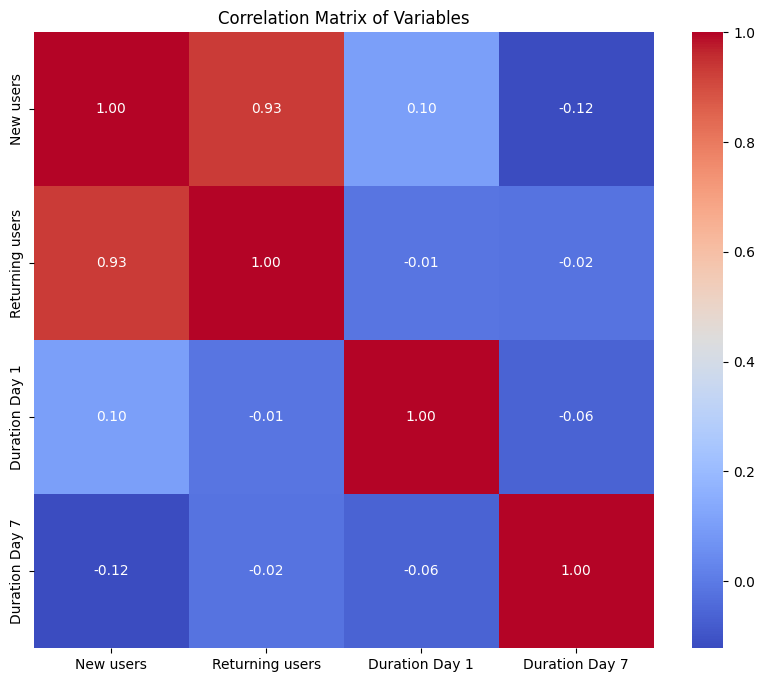

In [1]:
import pandas as pd

data = pd.read_csv("cohorts.csv")
print(data.head())
missing_values = data.isnull().sum()
print(missing_values)
data_types = data.dtypes
print(data_types)
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
# Display the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()